# TASK 2 - knapsack problem
 **Using brute force (BF), Branch and Bound (BnB), Dynamic programming (DP) techniques as exact algorithms,
then using Greedy heurstic and Fully Polynomial Approximation Scheme (FPTAS) algorithms.**

Link to git repository: [https://gitlab.fit.cvut.cz/fabosamu/mi-paa-knapsack](https://gitlab.fit.cvut.cz/fabosamu/mi-paa-knapsack)

Knapsack problem is one of the easiest NP-hard problems. It is an *combinatorial optimization* problem.
We are given 

- $n$ - number of items
- $M$ - knapsack capacity
- $V = {v_1, v_2, ..., v_n}$ - weights of items we want to put into knapsack
- $P = {p_1, p_2, ..., p_n}$

Fn the assignment - we need to solve *contructive (0/1)* problem: 

Is it possible to construct a set $X = {x_1, x_2, ..., x_n}$, where each $x_i$ is 0 or 1, so we will satisfy:

- $v_1x_1 + v_2x_2 + ... + v_nx_n \leq M$, so that the weight of items do not exceed the capacity of knapsack

and this expression

- $p_1x_1 + p_2x_2 + ... + p_nx_n $ will be maximal possible (the sum of prices for items in knapsack is required to be maximal).

\[[1](https://moodle-vyuka.cvut.cz/mod/page/view.php?id=48346)\]

## Brute Force (BF) Algorithm

BF is pretty straightforward - we try each combination of (0/1) vector of length $n$ (as an indicator of appearence of $item_i$ in knapsack) -> so in total we check $2^n$ combinations, which is very exhaustive.

We can cut down some no-go "heavy" states - when expanding the state space, we are cutting down those solutions, which exceed the capacity of the knapsack for granted (we have a lot of heavy items - why do we want to add more if we already exceed capacity?).

In my solution I used recursion. `n, M, weights, prices, max_conf, max_price, visited` we can take as some "global" variables for the problem (some are constants):
```
Brute_knapsack(config: (0/1) vector, i, weight: vector, price: vector):
    if i == n:
        visited ++
        if price >= max_price:
            max_price = price
            max_conf = config
        return

    config[i] = 1
    if Sum(config * weights) <= M:
        Brute_knapsack(conf, i + 1, Sum(config * weights), Sum(config * prices))

    config[i] = 0
    Brute_knapsack(conf, i + 1, Sum(config * weights), Sum(config * prices))
```
After adding an item to knapsack, we check, if it does not exceed capacity - line 10.

## Branch and Bound (BnB) Algorithm

In this algorithm we use so-called cost function - in this case it is the price of added items - to cut down more states needed to visit.

Through recursion calls we keep the best seen solution (`max_price`). In each recursive call we can check if the solution from this "branch" would not be less than the actual one. If so, we cut this subtree and dont dive into it.

In each recursive call we know what to add / not add:
- I know items of which I already made a decision
- I know the actual price of knapsack

The **Upper Bound** we gather as actual `price` + Sum of prices of items, of which I have not decided yet. If this bound is less than the best price obtained, we do not need to call recursively this subtree.

In my BnB algorithm, I first rearange the input so that prices are in descending order and weights are mapped to the same index as price. It is good to have it organized, as we can cut down states even faster - by looking on the items with high price first. To compute the upper bound, I sum the prices of yet unseen items and then compare it with maximal price already obtained. This is shown on lines 10 and 12.

```
Branch_bound(config, i, weight, price):
    if i == n:
        visited ++
        if price >= max_price:
            max_price = price
            max_conf = config
        return

    conf[i] = 1
    upper_bound = Sum(conf * prices) + Sum(prices[i:])

    if (Sum(config * weights) <= M) and (upper_bound >= max_price):
        branch_bound(config, i + 1, Sum(config * weights), Sum(conf * prices))

    conf[i] = 0
    branch_bound(config, i + 1, Sum(config * weights), Sum(conf * prices))
```

Again, `n, M, weights, prices, max_conf, max_price, visited` are constants and global variables.


## Dynamic Programming - decompostion by weight
### Naive implementation

A simple solution is to consider all subsets of items and calculate the total weight and value of all subsets. Consider the only subsets whose total weight is smaller than W. From all such subsets, pick the maximum value subset.

To consider all subsets of items, there can be two cases for every item: 
 - the item is included in the optimal subset, 
 - not included in the optimal set. 
 
Therefore, the maximum value that can be obtained from n items is max of following two values.
1. Maximum value obtained by n-1 items and W weight (excluding nth item).
2. Value of nth item plus maximum value obtained by n-1 items and W minus weight of the nth item (including nth item).

If weight of nth item is greater than W, then the nth item cannot be included and case 1 is the only possibility.

Pseudocode inspired by [geeksforgeeks](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/):
```
DP_Naive(W: max_capacity, wt: vector_weights, val: vector_prices, n: number_of_items):
    if n == 0 or W == 0:
        return 0
    if (wt[n - 1] > W):
        return DP_Naive(W, wt, val, n - 1)
    else:
        return max(val[n - 1] + DP_Naive(W - wt[n - 1], wt, val, n - 1),
                   DP_Naive(W, wt, val, n - 1))
```

### Iterative implementation

Since suproblems are evaluated again, this problem has Overlapping Subprolems property. So the 0-1 Knapsack problem has both properties (see this and this) of a dynamic programming problem. 

Like other typical Dynamic Programming(DP) problems, recomputations of same subproblems can be avoided by constructing a temporary array K\[\]\[\] in bottom up manner. Following is Dynamic Programming based implementation inspired by [geeksforgeeks](https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/):

```
def DP_Iterative(W: max_capacity, wt: vector_weights, val: vector_prices, n: number_of_items):
    K = array of size W+1 x n+1

    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            else if wt[i - 1] <= w:
                K[i][w] = max(val[i - 1] + K[i - 1][w - wt[i - 1]], K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]

    return K[n][W]
```


## Dynamic Programming (DP) - decompostion by price
### Iterative implementation

This approach is similar to DP technique above. What differs is the decomposition itself - by price - therefore we need to have the dimensions of the DP table (K) set as sum of prices of given instance times number of items.

$K(0,0) = 0$

$K(0,p) = \inf, \forall p > 0$

$K(i+1, p) = min(K(i, p), K(i, p-p_i+1)+w_i+1), \forall i > 0$.

From the resulting solutions in $W(n, c)$ we choose the solution, for which is $W(n, c) < M$ for the greatest price p.

```
def DP_iterative_by_price(M: max_capacity, wt: vector_weights, pc: vector_prices, n: number_of_items):
    sum_prices = Sum(pc)
    K = Zeros of size: (sum_prices + 1, n + 1)

    for i in range(n + 1):
        for p in range(sum_prices + 1):
            if p == 0:
                continue
            if i == 0:
                K[p][i] = Infinite
                continue

            if p == 1:
                K[p][i] = wt[i - 1] if (p == pc[i - 1]) else Infinite
                continue

            previous_weight = K[p][i - 1]
            index = p - pc[i - 1]

            if index < 0:
                K[p][i] = Infinite if (previous_weight == Infinite) else previous_weight
            else:
                if K[index][i - 1] == Infinite:
                    K[p][i] = min(previous_weight, K[index][i - 1])
                else:
                    K[p][i] = min(previous_weight, K[index][i - 1] + wt[i - 1])

    best_price = 0
    local_i = 0
    for i in reversed_range(sum_prices):
        local_i = i
        if K[i][n] <= M:
            best_price = i
            break
     
     includes = Zeros(n)

    c = n
    while local_i > 0:
        if K[local_i][c] == K[local_i][c - 1]:
            c -= 1
            continue

        local_i -= pc[c - 1]
        c -= 1
        includes[c] = 1

    return best_price, includes
```

## APR - approximative algorithms
Let's define:

- $P(S)$ Optimal value criterium of the solution $S$ 
- $APR(I)$ aprox. solution of instance $I$ 
- $OPT(I)$ optimální řešení instance $I$

APR algorithm has a relative quality $R$, if

- $\forall I: R \geq max\{ \frac{C(APR(I))}{C(OPT(I))}, \frac{C(OPT(I))}{C(APR(I))} \}$.

APR algorithm has a relative error $\varepsilon$, if

- $\forall I: \varepsilon \geq max\{ \frac{|C(APR(I)) - C(OPT(I))|}{ max\{C(OPT(I)), C(APR(I))\} } \}$.

Algorithm APR, which $\forall \varepsilon: 1 > \varepsilon > 0$ solve each instance of the problem with maximal relative error $\varepsilon$ in polynomial time $|I|$ - as a instance size we call Polynomial Time Approximation Scheme.

PTAS, which time depends polynomially on $\frac{1}{\varepsilon}$ we call **Fully Polynomial Approximation Scheme**


### Greedy heuristic algorithm

First we sort the items by ratio $\frac{weight_i}{price_i}$

Then we start adding an item with the highest ratio and continue adding others in descending order. When the backpack is full, we return the price of added items.

```
def Greedy(M: max_capacity, weights: vector_weights, prices: vector_prices, n: number_of_items):
    idxs = Argsort(pc / weights, Descending=True)
    wt = weights[idxs]
    pc = prices[idxs]
    max_price = 0
    for i in range(len(wt)):
        if M >= wt[i]:
            max_price = max_price + pc[i]
            M -= wt[i]
        else:
            return max_price
    return max_price
```

This heuristic has a problem - we might omit the most valuable item, which still can fit into backpack. 

Let's construct this kind of instance:

$M = kn, k > 0$ 

$v_1 = v_2 = \cdots = v_{n-1} = k$ and $v_n = M$

$p_1 = p_2 = \cdots = p_n-1 = k$ and $p_n = M-1$

This heuristic take all 1..n-1 items - ratio of these is 1 - while the ratio of the last n-th item is $\frac{M-1}{M}$. If we continue adding things in this order, the latest item cannot fit into backpack. Overall price is n-1, while optimal is the single n-th item. 




### Modified Greedy Heuristic - Redux

For given instance we first obtain the solution by greedy heuristic algorithm. Then we compare it with the most-valued item, which can still fit into the backpack.

```
def GreedyRedux(M: max_capacity, weights: vector_weights, prices: vector_prices, n: number_of_items):
    greedy_max_price = Greedy(M, weights, prices, n)
        
    idxs = Argsort(prices, Descending=True)
    pc = prices[idxs]
    wt = weights[idxs]
    solo_max_price = 0
    for i in range(len(pc)):
        if wt[i] <= M:
            solo_max_price = pc[i]
     
    return max(greedy_max_price, solo_max_price)
        
```


### Fully Polynomial Approximation Scheme (FPTAS) algorithm

In the beginning, we are given $\varepsilon$ as the maximal relative error we want to have.

- Let $C_M = max{c_1, \cdots, c_n}$
- Let $K_ = \frac{\varepsilon C_M}{n}$
- For $i = \{ 1, \cdots, n \}: c'_i = \lfloor \frac{c_i}{K} \rfloor$ - this is how we "approximate". We "cut" down some least significant bits (LSB) of the prices for each item.

Then we solve this modified instance by DP with decomposition by price.

The pseudocode is straightforward:

```
def FPTAS(M, weights, prices, n, eps):
    C_M = Max(prices)
    K = (eps * C_M) / n
    prices_red = Floor(prices / K)
    
    price, witness = DP_iterative_by_price(M, weights, prices_red, n)

    return Sum(prices[witness])
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
import os
sys.path.append("..")
from utilities import Problem, Solution
import solvers as S

# helper function for graph bars labeling
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

# Introduction

Maintenance and overhead around input/output is in the `main.py` file - where I also test the righteousness and optimality of the found witnesses.
Helper classes are in `utilities.py` file, algorithms are implemented in `solvers.py` file.
Results are stored in `results` folder, categorized by type of input, algorithm used and number of items for backpack.

These result sets contain information from solution files, where construction problem is solved. 
It comes with the optimal price for each instance and also the optimal vector of (0/1) indicators of appearance in the result set. 

In my result sets, I check if I reached the optimal price (column **status** - witness check). This is the solution of the *constructive problem* as assigned.

# Algorithms comparison
## CPU runtime measurements

I randomly choose 100 instances from each of the sets, for n <= 20 and I measure time with `timeit`. For each instance I reset the timer twice and run the solver 3 times. In total, I have 6 measuerments and then I take the average and put it into the table.

I ran this measurements on a MacBook Pro machine:
- Processor: 2,5 GHz Dual-Core Intel Core i7
- Memory: 16 GB 2133 MHz LPDDR3

*Note: uncomment, if you want to rerun all the runtime measurements. Saved in `time.csv` file, for each algorithm one.*

In [2]:
# k = 100
# ns = [4, 10, 15, 20]
# results = []

# for group in [
#     "NK",
#     "ZKC", 
#     "ZKW"
# ]:
#     for solver in [
#         S.Brute,
#         S.BranchBound,
#         S.DPNaive,
#         S.DPIterative,
#         S.DPIterativeByPrice,
#         S.Greedy,
#         S.GreedyRedux
#     ]:
#         filename = f"data/results/{group}/{solver.name()}/time.csv"
#         if os.path.exists(filename):
#             dft = pd.read_csv(filename)
#         else:
#             dft = pd.DataFrame()
        
#         for num in ns:
#             if str(num) in dft.columns:
#                 print(f"num {num} already in file!")
#                 continue
#             inst_lines = [line.rstrip('\n') for line in open(f"./data/{group}/{group}{num}_inst.dat")]
#             samples = random.choices(inst_lines, k=k)
#             times = list()
#             print("|"*k)
#             for sample in samples:
#                 print("|", end="")
#                 inst = list(map(int, sample.split()))
#                 p = Problem(inst[0], inst[1], inst[2], np.array(inst[3::2]), np.array(inst[4::2])) 
#                 t = %timeit -oq -r 2 -n 3 solver(p).solve()
#                 times.append(np.mean(t.all_runs))
            
#             dft[num] = times
#             print(num, solver.name())
#         print(dft)
#         print("=" * 50, num, solver.name())
#         dft.to_csv(filename, index=False)

Now let's construct boxplots, with time consumed - for each group of input and various exact solvers:

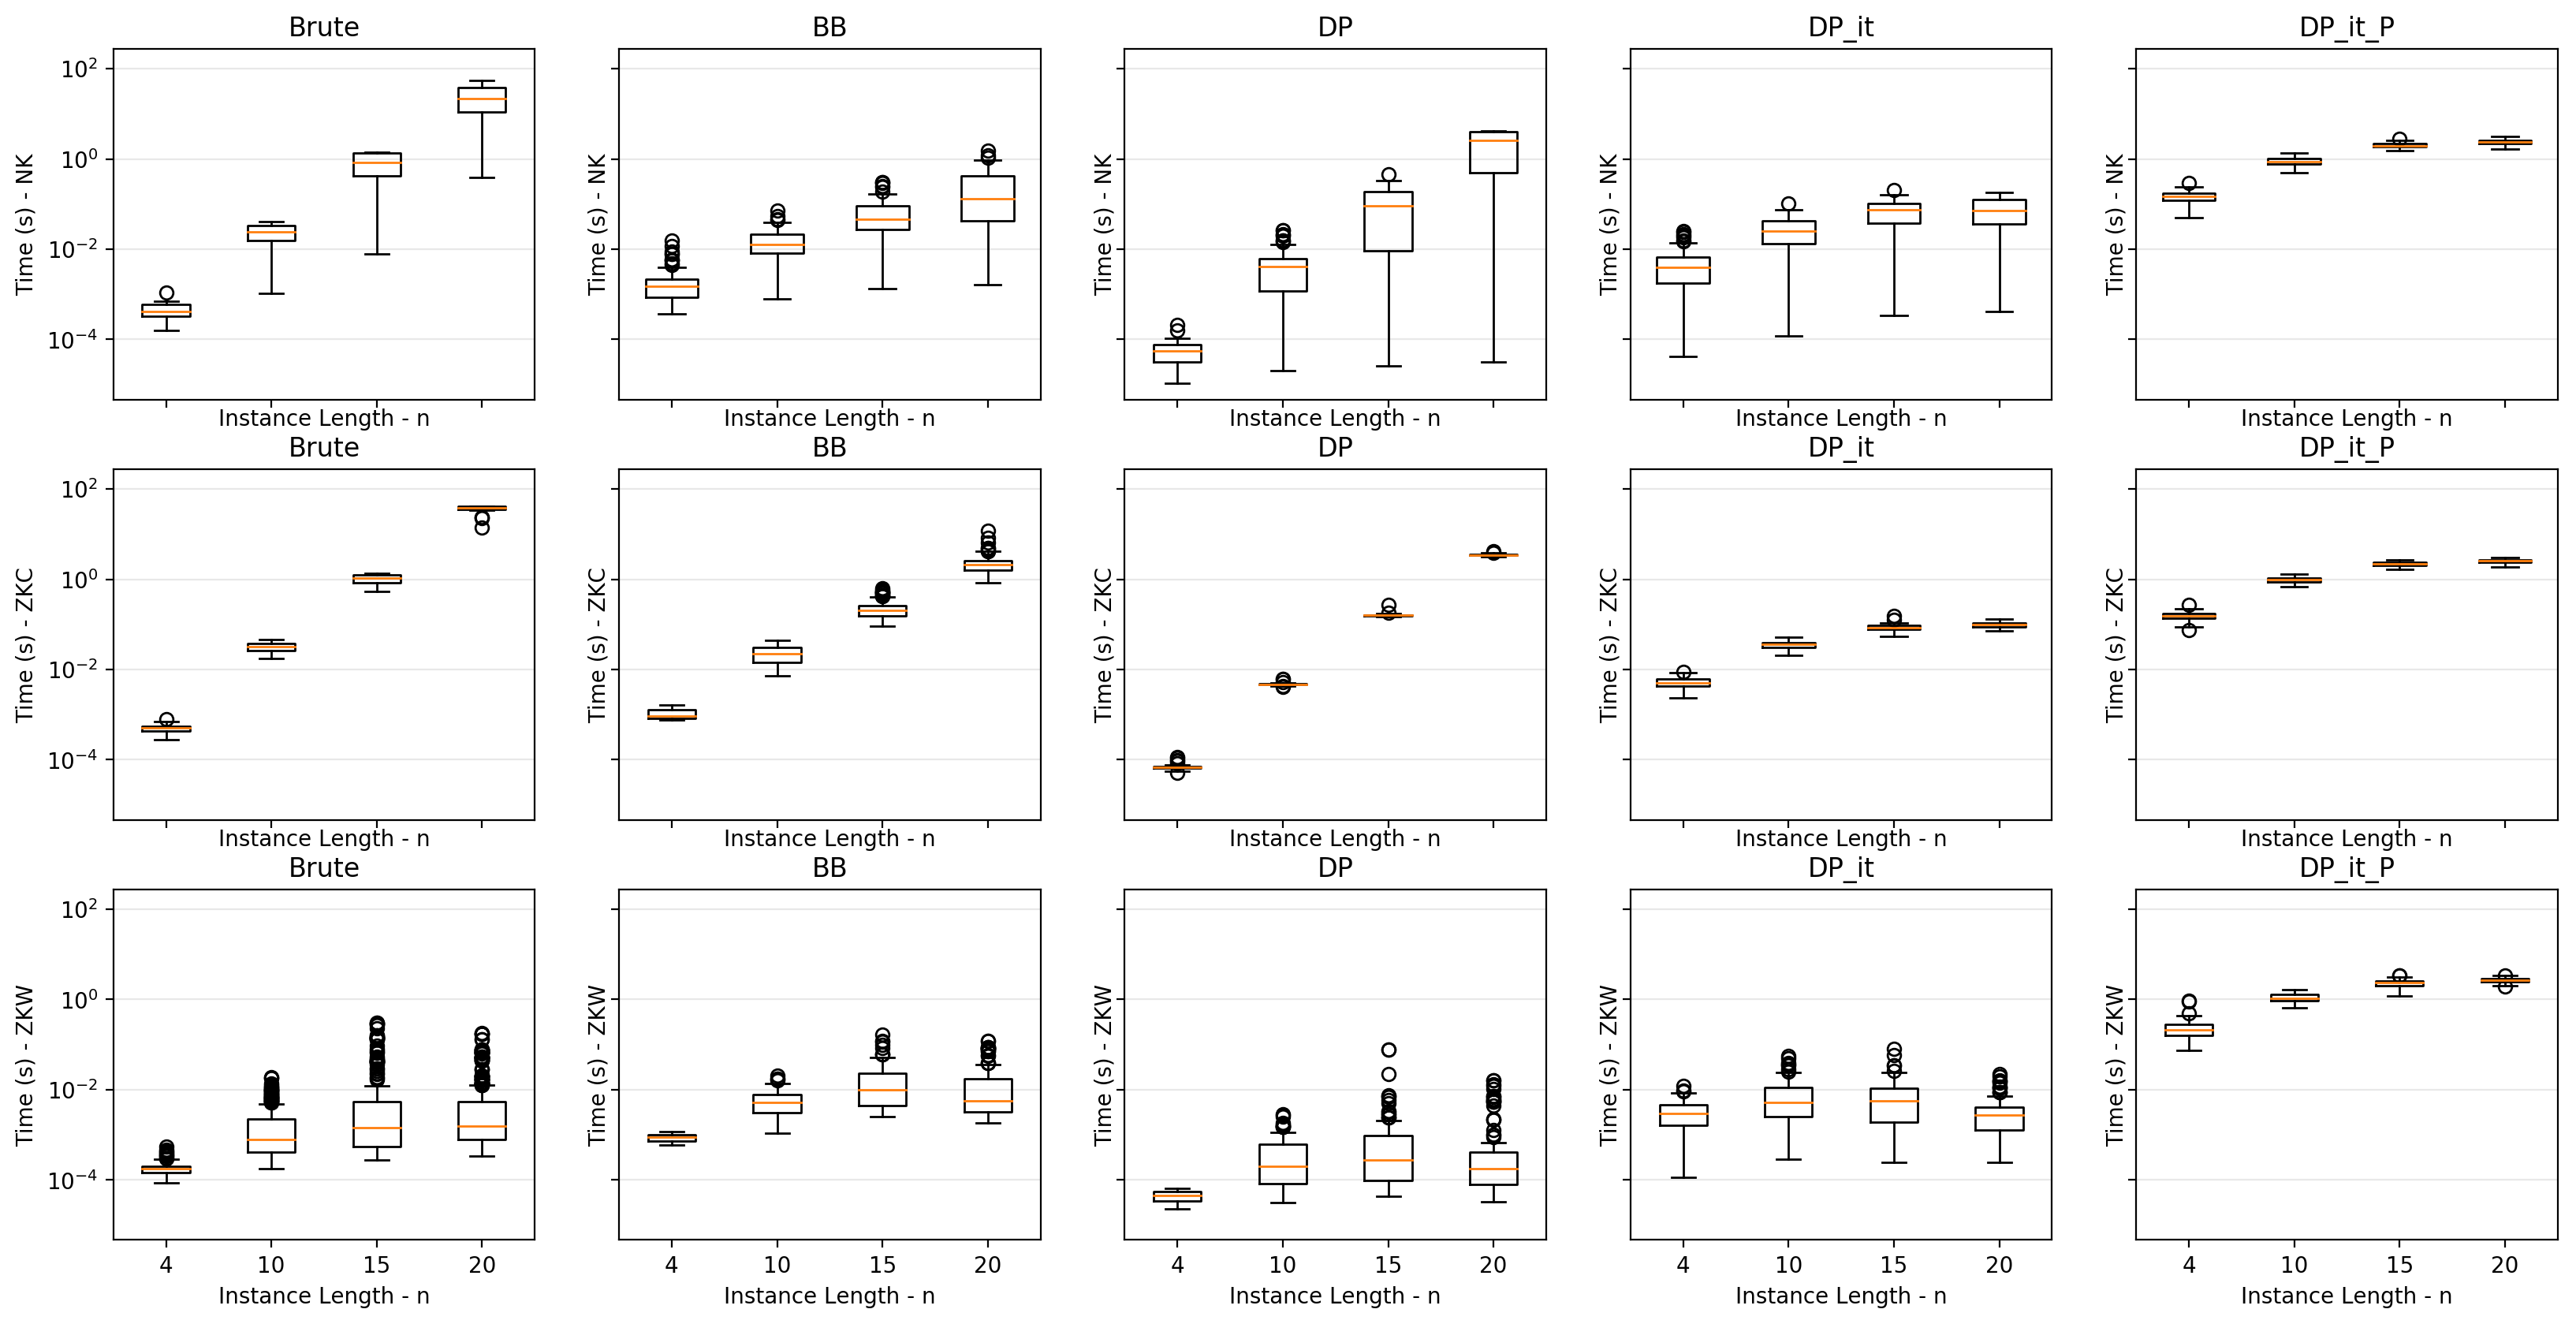

In [3]:
ns = [4, 10, 15, 20]
groups = ["NK", 
          "ZKC", 
          "ZKW"]
g = 0
fig, axs = plt.subplots(len(groups), 5, sharey=True, sharex=True, figsize=(20, 10), dpi=200)
for (x,y), value in np.ndenumerate(axs):
    axs[x,y].yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
for group in groups:
    s = 0
    for solver in [
        S.Brute,
        S.BranchBound,
        S.DPNaive,
        S.DPIterative,
        S.DPIterativeByPrice,
    ]:
        filename = f"data/results/{group}/{solver.name()}/time.csv"
        
        
        if os.path.exists(filename):
            dft = pd.read_csv(filename)
        else:
            dft = pd.DataFrame()
            
        dft = dft.loc[:, ~dft.columns.str.contains('^Unnamed')]

        ax = axs[g, s]
        ax.boxplot(dft.T)
        ax.set_title(solver.name())
        ax.set_ylabel("Time (s) - " + group)
        ax.set_xlabel("Instance Length - n")
        ax.set_xticklabels(ns)
        
        s += 1
    g += 1

plt.yscale('log')

## Legend
- `Brute` - Brute force
- `BB` - Branch and Bound
- `DP` - naive implementation by Dynamic programming - decomposition by **weight**
- `DP_it` - iterative implementation by Dynamic programming - decomposition by **weight**
- `DP_it_P` - iterative implementation by Dynamic programming - decomposition by **price**

- Time was measured in seconds
- Each graph has logarithmic y-scale

## Let's first focus on NK - randomly generated instances:
- BF is growing exponentially (as expected), 
- BB is doing well, but still exponential.
- DP (naive) is doing well - on small instances even better than BB, but with bigger instances it just copies BF (minus some constant).
- DP (iterative, decomposed by weight) is doing much better, mostly on higher instances (comparing to previous algorithms in the row). This may be the expected "psudopolynomial" time consumption.
- DP (iterative, decomposed by price) is pretty stable, again - does not look exponential, rather (pseudo)polynomial.

## How about ZKC?
- BF stable exponential growth
- BB pretty much the same - with smaller time consumption than BF
- DP (naive) is copying BF minus some constant 
- DP (iterative, decomposed by weight) is doing very well - again, pseudopolynomial (best from all exact ones)
- DP (iterative, decomposed by price) is just slightly higher than DP_it_w, still polynomial and stable.

## The wildest part - ZKW
- BF is doing great - it looks like this set of instances was chosen to demonstrate how BF (enpowered with weights-cutter, when visiting state space) can overcome some more stable algorithms.
- BB is working well, again benefiting on the fact, that it can cut down some of the states sooner than BF.
- DP(naive, decomposed by weights) is the winner of this comparison - even better than DP_it_w. I would say, this is caused by the construction of the table in iterative version and the overhead of iterating through all elements in this table.
- DP (iterative, decomposed by weight) looks like its doing better than BB - but why is the time falling with higher n? Maybe I should have taken more instances for the measurement. And I think - thanks to combinatorics - there are more instances, which can be computed in smaller time, with rising number of items - but only in "cherry-picked datasets".
- DP (iterative, decomposed by price) is worst than BF. WHAT? Well, I think this is caused - again - by a very delicious instance picker.

## Conclusion

I think, that the person, who was creating the instance sets ("Mr. Malicious - **Z**lomyslny") just took outliers from bruteforce time measurements - those, where BF was doing great.

Anyways, the best part - **DP_it_P was stable in terms of time, even when given malicious instances.** It was taking almost the same time with any kind of input. This is good, and that's why we use it for FPTAS - and not the DP_it_W, which was doing better on picked-by-weight instances. But - this is just my speculation.

## FPTAS
### Time
- Below is another time measurement, but for FPTAS. *Uncomment, if needed*

In [4]:
# k = 150
# eps = [0.01, 0.05, 0.1, 0.2]
# ns = [4, 10, 15, 20]
# results = []
# for e in eps:
#     for group in ["NK",
#                   "ZKC", 
#                   "ZKW"
#                   ]:
#         for solver in [
#                     S.FPTAS
#                 ]:
#             filename = f"data/results/{group}/{solver.name()}/time{e}.csv"
#             if os.path.exists(filename):
#                 dft = pd.read_csv(filename)
#             else:
#                 dft = pd.DataFrame()
#             for num in ns:
#                 if str(num) in dft.columns:
#                     print(f"num {num} already in file!")
#                     continue
#                 inst_lines = [line.rstrip('\n') for line in open(f"./data/{group}/{group}{num}_inst.dat")]
#                 samples = random.choices(inst_lines, k=k)
#                 times = list()
#                 print(e, group, num, solver.name())
#                 print("|"*k)
#                 for sample in samples:
#                     print("|", end="")
#                     inst = list(map(int, sample.split()))
#                     p = Problem(inst[0], inst[1], inst[2], np.array(inst[3::2]), np.array(inst[4::2])) 
#                     t = %timeit -oq -r 2 -n 2 solver(p).solve(e)
#                     times.append(np.mean(t.all_runs))

#                 dft[num] = times
# #             print(dft)
#             print("=" * 50, num, solver.name())
#             dft.to_csv(filename, index=False)

In [5]:

eps = [0.01, 0.05, 0.1, 0.2]
groups = ["NK", "ZKC", "ZKW"]
solver = S.FPTAS

g = 0
fig, axs = plt.subplots(len(groups), 5, sharey=True, sharex=True, figsize=(20,10), dpi=200)
for (x,y), value in np.ndenumerate(axs):
    axs[x,y].yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
for group in groups:
    s = 0
    for e in eps:
        filename = f"data/results/{group}/{solver.name()}/time{e}.csv"
        
        if os.path.exists(filename):
            dft = pd.read_csv(filename)
        else:
            dft = pd.DataFrame()
        dft = dft[list(map(str, ns))]
        ax = axs[g, s]
        ax.boxplot(dft.T)
        ax.set_title(solver.name()+" "+str(e))
        ax.set_ylabel("Time (s) - " + group)
        ax.set_xlabel("Instance Length - n")
        ax.set_xticklabels(ns)
        
        s += 1
    
    dft = pd.read_csv(f"data/results/{group}/{S.DPIterativeByPrice.name()}/time.csv")
    dft = dft[list(map(str, ns))]
    ax = axs[g, s]
    ax.boxplot(dft.T)
    ax.set_title(S.DPIterativeByPrice.name())
    ax.set_ylabel("Time (s) - " + group)
    ax.set_xlabel("Instance Length - n")
    ax.set_xticklabels(ns)
    g += 1

plt.yscale('log')

In the graph above we can see comparison of FPTAS algorithm, running with different $\varepsilon$. *The last column* is just the regular **DP, decomposed by price** - for comparison with exact algorithm.

Those outliers in NK instance set is are instances, where I throw out items, which cannot fit into the backpack. Therefore the computation time falls to minimum - the number of items falls down.

Thanks to removing these heavy items, FPTAS is working better on ZKW instance set than on the others. FPTAS on ZKC instance set is pretty stable.

### Errors

As expected, the time is falling, when $\varepsilon$ is greater - we are expecting higher error:

In [6]:
ns = [4, 10, 15, 20]
groups = ["NK", 
          "ZKC", 
          "ZKW"
         ]

for group in groups:
    dfr = pd.DataFrame()
    results = list()
    for num in ns:
        solver = S.FPTAS
        filename = f"data/results/{group}/{solver.name()}/{group}{num}_out.csv"
        df = pd.read_csv(filename)
        df = df.fillna(0)
#         display(df)
        ks = [0.01, 0.05, 0.1, 0.2]
        res = dict()
        for k in ks:
            res.update({f"{k} avg err": df[f"{k} err:"].mean(), 
                        f"{k} max err": df[f"{k} err:"].max()})
        results.append({"n": num, **res})
    dfr = pd.DataFrame(results)
    dfr.set_index("n", inplace=True)
    print("="*50, group, "="*50)
    display(dfr)
    

================================================== NK ==================================================


0.01 avg err  0.01 max err  0.05 avg err  0.05 max err  0.1 avg err  \
n                                                                         
4   5.062010e-06      0.002531      0.000023      0.009132     0.000354   
10  3.436474e-07      0.000101      0.000011      0.001222     0.000026   
15  1.302592e-07      0.000065      0.000005      0.000860     0.000026   
20  2.184121e-07      0.000109      0.000005      0.001941     0.000011   

    0.1 max err  0.2 avg err  0.2 max err  
n                                          
4      0.036078     0.000798     0.083893  
10     0.002134     0.000317     0.078431  
15     0.003003     0.000071     0.005986  
20     0.001941     0.000107     0.040306

================================================== ZKC ==================================================


0.01 avg err  0.01 max err  0.05 avg err  0.05 max err  0.1 avg err  \
n                                                                         
4   4.796070e-06      0.001484      0.000106      0.007500     0.000373   
10  9.753198e-07      0.000130      0.000069      0.001231     0.000269   
15  1.879800e-06      0.000164      0.000061      0.001279     0.000212   
20  1.804531e-06      0.000064      0.000050      0.000675     0.000150   

    0.1 max err  0.2 avg err  0.2 max err  
n                                          
4      0.017082     0.001080     0.040284  
10     0.004709     0.001004     0.011128  
15     0.001827     0.000575     0.004442  
20     0.001215     0.000406     0.002303

================================================== ZKW ==================================================


0.01 avg err  0.01 max err  0.05 avg err  0.05 max err  0.1 avg err  \
n                                                                         
4   2.551030e-07      0.000243      0.000060      0.015251     0.000144   
10  1.194124e-05      0.001500      0.000103      0.013629     0.000175   
15  0.000000e+00      0.000000      0.000027      0.002778     0.000203   
20  0.000000e+00      0.000000      0.000000      0.000000     0.000120   

    0.1 max err  0.2 avg err  0.2 max err  
n                                          
4      0.025186     0.000720     0.092338  
10     0.016220     0.000647     0.051179  
15     0.009777     0.000786     0.036217  
20     0.009248     0.000432     0.017655

In tables above we can see the maximal relative error (MRE) through all given instances and also average relative error computed as:

- $\forall I: \varepsilon \geq max\{ \frac{|C(APR(I)) - C(OPT(I))|}{ max\{C(OPT(I)), C(APR(I))\} } \}$.

Every MRE is OK and satisfies, what we were awaiting - the MRE is surprisingly lower than the $\varepsilon$ we have chosen.

If I did not remove heavy items from the instance, some of the MREs would be larger than the chosen $\varepsilon$.

It looks like it's always better to try more $\varepsilon$, and choose the one, which fits us the best in terms of time and awaited error.

## Greedy & GreedyRedux

In [7]:
ns = [4, 10, 15, 20, 25]
groups = ["NK", 
          "ZKC", 
          "ZKW"
         ]
g = 0
fig, axs = plt.subplots(len(groups), 2, sharey=True, sharex=True, figsize=(15, 10
                                                                          ))
for (x,y), value in np.ndenumerate(axs):
    axs[x,y].yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
for group in groups:
    s = 0
    for solver in [
                S.Greedy,
                S.GreedyRedux
            ]:
        filename = f"data/results/{group}/{solver.name()}/time.csv"
        
        
        if os.path.exists(filename):
            dft = pd.read_csv(filename)
        else:
            dft = pd.DataFrame()
            
        dft = dft.loc[:, ~dft.columns.str.contains('^Unnamed')]

        ax = axs[g, s]
        ax.boxplot(dft.T)
        ax.set_title(solver.name())
        ax.set_ylabel("Time (s) - " + group)
        ax.set_xlabel("Instance Length - n")
        ax.set_xticklabels(ns)
        
        s += 1
    g += 1
# plt.show()
plt.yscale('log')

What to say... It. Is. Fast. Precisely $ O(n) $. But errorneous, as we can see in the table below:

## Errors

In [8]:
ns = [4, 10, 15, 20]
groups = ["NK", 
          "ZKC", 
          "ZKW"
         ]

for group in groups:
    dfr = pd.DataFrame()
    results = list()
    for num in ns:
        res = dict()
        for solver in [S.Greedy, S.GreedyRedux]:
            filename = f"data/results/{group}/{solver.name()}/{group}{num}_out.csv"
            df = pd.read_csv(filename)
#             print(df[["max price", "opt price"]].max(axis=1) )
            rel_err = abs( (df["max price"] - df["opt price"]) / df[["max price", "opt price"]].max(axis=1) )
            df["rel err"] = rel_err
            df["rel err"].fillna(0, inplace=True)
            k = solver.name()
            res.update({f"{k} avg err": df["rel err"].mean(), 
                        f"{k} max err": df["rel err"].max(),
                        f"{k} acc in %": df['status'].mean() * 100
                       })
        results.append({"n": num, **res})
    dfr = pd.DataFrame(results)
    dfr.set_index("n", inplace=True)
    print("="*30, group, "="*30)
    display(dfr)

============================== NK ==============================


Greedy acc in %  Greedy avg err  Greedy max err  Redux acc in %  \
n                                                                     
4              78.4        0.051731             1.0            82.0   
10             51.0        0.039984             1.0            52.0   
15             47.6        0.027787             1.0            48.2   
20             41.4        0.024825             1.0            41.8   

    Redux avg err  Redux max err  
n                                 
4        0.024941       0.384644  
10       0.032519       0.313882  
15       0.025333       0.289100  
20       0.021965       0.293186

============================== ZKC ==============================


Greedy acc in %  Greedy avg err  Greedy max err  Redux acc in %  \
n                                                                     
4              42.4        0.129397        0.490298            43.8   
10             10.4        0.090230        0.249584            10.4   
15              7.4        0.061398        0.154858             7.4   
20              5.0        0.050131        0.111739             5.0   

    Redux avg err  Redux max err  
n                                 
4        0.124305       0.430881  
10       0.090230       0.249584  
15       0.061398       0.154858  
20       0.050131       0.111739

============================== ZKW ==============================


Greedy acc in %  Greedy avg err  Greedy max err  Redux acc in %  \
n                                                                     
4          2.830189        0.361349        0.992908       98.322851   
10         3.040541        0.301533        0.990654       84.121622   
15         5.844156        0.261704        0.937500       79.870130   
20         2.597403        0.265437        0.816531       79.220779   

    Redux avg err  Redux max err  
n                                 
4        0.001045       0.143221  
10       0.012119       0.213391  
15       0.015699       0.219789  
20       0.015919       0.132229

In the table above we can see the maximal relative error (MRE), average relative error and also overall accuracy (acc) - how many solutions are correct.

### Greedy (plain)

In NK set we can see that greedy is not doing very good in terms of MRE - which equals only to 1.0
This heuristic is working good on randomly generated data, however, when given bigger instances, this technique tends to fall into ~50% accuracy.

### Greedy (redux)

However, using Redux, we can we can eliminate those problems mentioned above and obtain better MRE and accuracy, well, not everytime. 

- We can see in ZKC, how *redux has similar accuracy than plain greedy*. MRE is better, but this demonstrates the fact, that Redux is not working very well on malicious input.


# Conclusion
**(Czech & English, I am sorry for mixing)**

1. Naprogramujte řešení konstruktivní verze problému batohu:
 - metodou dynamického programování (dekompozice podle kapacity nebo podle cen),
 - jednoduchou greedy heuristikou
 - modifikací této heuristiky, která uvažuje také řešení se sólo nejdražší věcí
 - FPTAS algoritmem, tj. s použitím modifikovaného dynamického programování s dekompozicí podle ceny (při použití dekompozice podle kapacity není algoritmus FPTAS).

**Done, I implemented all the algorithms mentioned above, described them in the beginning of this document and tested, if they work well.**

2. Na zkušebních instancích experimentálně vyhodnoťte závislost výpočetního času a u všech heuristických algoritmů také relativní chyby na velikosti instance.

**Done, I measured time for each algorithm separately and showed graphs, with relevant information. I compared the measurements with other algorithms, on different datasets.**

3. Popis implementovaných metod.

**Done in the introductory part**

- Srovnání výpočetních časů hrubé síly, dynamického programování a aproximativního algoritmu (grafy vítány).
- U FPTAS algoritmu pozorujte (naměřte, zdokumentujte) závislost chyby a výpočetního času algoritmu na zvolené přesnosti zobrazení (pro několik různých přesností), srovnání maximální naměřené chyby s teoreticky předpokládanou.

**It was surprising, how brute force (not the dummy one) and naive DP have overtaken other algorithms in the ZKW set. When computing malicious instances, we need to be careful, what type of algorithm to use. The FPTAS is always fast. It tends to be polynomial with some constant, depending on $\varepsilon$. However, we need to take in mind the error we are going to get in the results.**

- Tj. zvolte několik požadovaných přesností (ε), v závislosti na ε měřte čas běhu a reálnou (maximální, případně i průměrnou) chybu algoritmu.

**I have chosen 4 values for $\varepsilon$, and measured time for each. Higher the $\varepsilon$, higher the error and smaller the time. I measured also average and maximal relative error.**

- Pozor! Pokud implementujete FPTAS pomocí zanedbávání bitů, musíte pro daný počet zanedbaných bitů vypočítat max. chybu (ε). V experimentálních výsledcích by počet zanedbaných bitů neměl figurovat, neb neříká nic konkrétního o přesnosti. Pozor, tato max. chyba je jiná pro každou instanci, nezávisí pouze na velikosti instance, ale také na max. ceně.

**I use floor function - and I get the MRE for each instance.**

- Zhodnocení naměřených výsledků.

**As almost always, there is not single universal method, which suits the best. We need to define, if we are OK with errors in the output, or if we don't care if the computation is going to take a long time or if we want ~50% accuracy and near-to-linear time complexity. While having an instance set where the instances are specifically picked to downgrade the Greedy Redux algorithm, it can have very poor accuracy.**